<a href="https://colab.research.google.com/github/YCYoon2015/DL_zero_to_all_PyTorch/blob/master/210908_Basic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lec 01: 기본적인 Machine Learning 의 용어와 개념 설명

### Supervised/Unsupervised learning

> 지도, 비지도 교육

본 수업에서는 지도학습을 주로 다룬다.

지도학습: 이미지 분류, 스팸메일 분류, 시험 성적 예측


### Types of supervised learning (학습 데이터)

- Regression: 범위 점수
- Binary classification
- Multi-label classification


### Regression

> Reqression toward the mean

#### Linear Regression

선형회귀, 

가설 H = Wx + b

Cost는  가설의 값과 실제 값의 차


(0.0, 8.0)

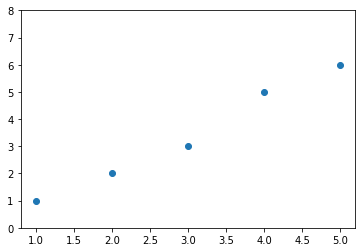

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 5, 6]

W = tf.Variable(2.9) # 임의 초기값
b = tf.Variable(0.5)

hypothesis = W * x_data + b # 가설 (선형)

2.6.0


In [ ]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data)) # 에러 제곱의 평균
#      줄이며 평균 구하기(각 항을 제곱)

In [ ]:
print(cost) # tensor

tf.Tensor(38.82, shape=(), dtype=float32)


### Gradient descent

minimize cost(W,b)

In [ ]:
learning_rate = 0.01 # Gradient를 얼마나 반영할 것인가

with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))

w_grad, b_grad = tape.gradient(cost, [W, b]) # cost에 대해 [W, b] 각각 미분값을 구해 튜플로 반환 
"""
A.assign_sub(B)
A = A - B 의미한다. (객체가 Tensor라 직접 연산으로 쓰지 못하고 함수로 사용한다.)
기울기값을 빼면, 최소값으로 다가가게 된다.
"""
W.assign_sub(learning_rate * w_grad) # 값을 업데이트 한다.
b.assign_sub(learning_rate * b_grad)


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.384>

In [ ]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 5, 6]

W = tf.Variable(2.9) # 임의 초기값
b = tf.Variable(0.5)

for i in range(101): # 위 러닝을 여러번 수행
  with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

  w_grad, b_grad = tape.gradient(cost, [W, b]) 
  W.assign_sub(learning_rate * w_grad) 
  b.assign_sub(learning_rate * b_grad)

  # 중간 변화 확인
  if i % 10 == 0:
    print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|    2.4880|    0.3840| 38.820000
   10|    1.2514|    0.0230|  0.280341
   20|    1.1726|   -0.0167|  0.103302
   30|    1.1714|   -0.0343|  0.099732
   40|    1.1754|   -0.0499|  0.097126
   50|    1.1795|   -0.0649|  0.094695
   60|    1.1835|   -0.0794|  0.092422
   70|    1.1874|   -0.0934|  0.090299
   80|    1.1911|   -0.1069|  0.088315
   90|    1.1947|   -0.1200|  0.086461
  100|    1.1983|   -0.1327|  0.084728


(0.0, 8.0)

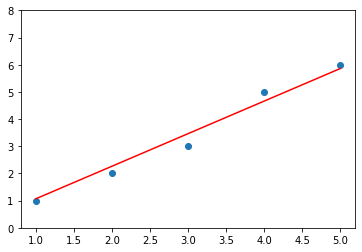

In [ ]:
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

In [ ]:
print(W, b)
print(W.numpy(), b.numpy())

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.1982538> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.132664>
1.1982538 -0.132664


Cost function in pure python

In [ ]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  c = 0
  for i in range(len(X)): # 오차의 곱 누적
    c += (W * X[i] - Y[i]) ** 2
  return c / len(X) # 평균

for feed_W in np.linspace(-3, 5, num=15): # 시작, 끝, 구간의 수
  curr_cost = cost_func(feed_W, X, Y)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost)) # W값에 따른 cost 값

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


Cost function in TensorFlow

In [ ]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
  curr_cost = cost_func(feed_W, X, Y)
  cost_values.append(curr_cost)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


# Gradient Descent 구현

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.6.0


In [2]:
tf.random.set_seed(0)

In [4]:
X = [1., 2., 3., 4.]
Y = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal((1,), -100., 100.)) # 모양 평균 분산

for step in range(300):
  hypothesis = W * X
  cost = tf.reduce_mean(tf.square(hypothesis - Y))

  alpha = 0.01
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
  descent = W - tf.multiply(alpha, gradient)
  W.assign(descent)

  if step % 10 == 0:
    print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 |   189.2715 |   6.311418
   10 |    39.9350 |   3.796668
   20 |     8.5299 |   2.643447
   30 |     1.9254 |   2.114601
   40 |     0.5365 |   1.872082
   50 |     0.2444 |   1.760866
   60 |     0.1830 |   1.709865
   70 |     0.1701 |   1.686477
   80 |     0.1674 |   1.675751
   90 |     0.1668 |   1.670833
  100 |     0.1667 |   1.668577
  110 |     0.1667 |   1.667543
  120 |     0.1667 |   1.667069
  130 |     0.1667 |   1.666851
  140 |     0.1667 |   1.666751
  150 |     0.1667 |   1.666705
  160 |     0.1667 |   1.666685
  170 |     0.1667 |   1.666675
  180 |     0.1667 |   1.666670
  190 |     0.1667 |   1.666668
  200 |     0.1667 |   1.666667
  210 |     0.1667 |   1.666667
  220 |     0.1667 |   1.666667
  230 |     0.1667 |   1.666667
  240 |     0.1667 |   1.666667
  250 |     0.1667 |   1.666667
  260 |     0.1667 |   1.666667
  270 |     0.1667 |   1.666667
  280 |     0.1667 |   1.666667
  290 |     0.1667 |   1.666667


bias가 없기때문에 0.166으로 수렴

In [5]:
print(5.0 * W)
print(2.5 * W)

tf.Tensor([8.333338], shape=(1,), dtype=float32)
tf.Tensor([4.166669], shape=(1,), dtype=float32)
